# Hypothesis Testing in Healthcare: Drug Safety

A pharmaceutical company GlobalXYZ has just completed a randomized controlled drug trial. To promote transparency and reproducibility of the drug's outcome, they (GlobalXYZ) have presented the dataset to your organization, a non-profit that focuses primarily on drug safety.

The dataset provided contained five adverse effects, demographic data, vital signs, etc. Your organization is primarily interested in the drug's adverse reactions. It wants to know if the adverse reactions, if any, are of significant proportions. It has asked you to explore and answer some questions from the data.

The dataset `drug_safety.csv` was obtained from [Hbiostat](https://hbiostat.org/data/) courtesy of the Vanderbilt University Department of Biostatistics. It contained five adverse effects: headache, abdominal pain, dyspepsia, upper respiratory infection, chronic obstructive airway disease (COAD), demographic data, vital signs, lab measures, etc. The ratio of drug observations to placebo observations is 2 to 1.

For this project, the dataset has been modified to reflect the presence and absence of adverse effects `adverse_effects` and the number of adverse effects in a single individual `num_effects`.

The columns in the modified dataset are: 

| Column | Description |
|--------|-------------|
|`sex` | The gender of the individual |
|`age` | The age of the individual |
|`week` | The week of the drug testing |
|`trx` | The treatment (Drug) and control (Placebo) groups | 
|`wbc` | The count of white blood cells |
|`rbc` | The count of red blood cells |
|`adverse_effects` | The presence of at least a single adverse effect |
|`num_effects` | The number of adverse effects experienced by a single individual |

The original dataset can be found [here](https://hbiostat.org/data/repo/safety.rda).

Your organization has asked you to explore and answer some questions from the data collected. See the project instructions.

In [28]:
# Import packages
import numpy as np
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest
import pingouin
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
drug_safety = pd.read_csv("drug_safety.csv")

# Start coding here...

## Explaratory Data Analysis

First few rows of the dataset:
    age   sex   trx  week  wbc  rbc adverse_effects  num_effects
0    62  male  Drug     0  7.3  5.1              No            0
1    62  male  Drug     1  NaN  NaN              No            0
2    62  male  Drug    12  5.6  5.0              No            0
3    62  male  Drug    16  NaN  NaN              No            0
4    62  male  Drug     2  6.6  5.1              No            0
5    62  male  Drug    20  NaN  NaN             Yes            1
6    62  male  Drug     4  6.9  5.2             Yes            1
7    62  male  Drug     8  7.1  5.0             Yes            1
8    69  male  Drug     0  8.8  5.1              No            0
9    69  male  Drug     1  NaN  NaN              No            0
10   69  male  Drug    12  9.0  5.1              No            0
11   69  male  Drug    16  NaN  NaN              No            0
12   69  male  Drug     2  8.1  5.2              No            0
13   69  male  Drug    20  NaN  NaN              No        

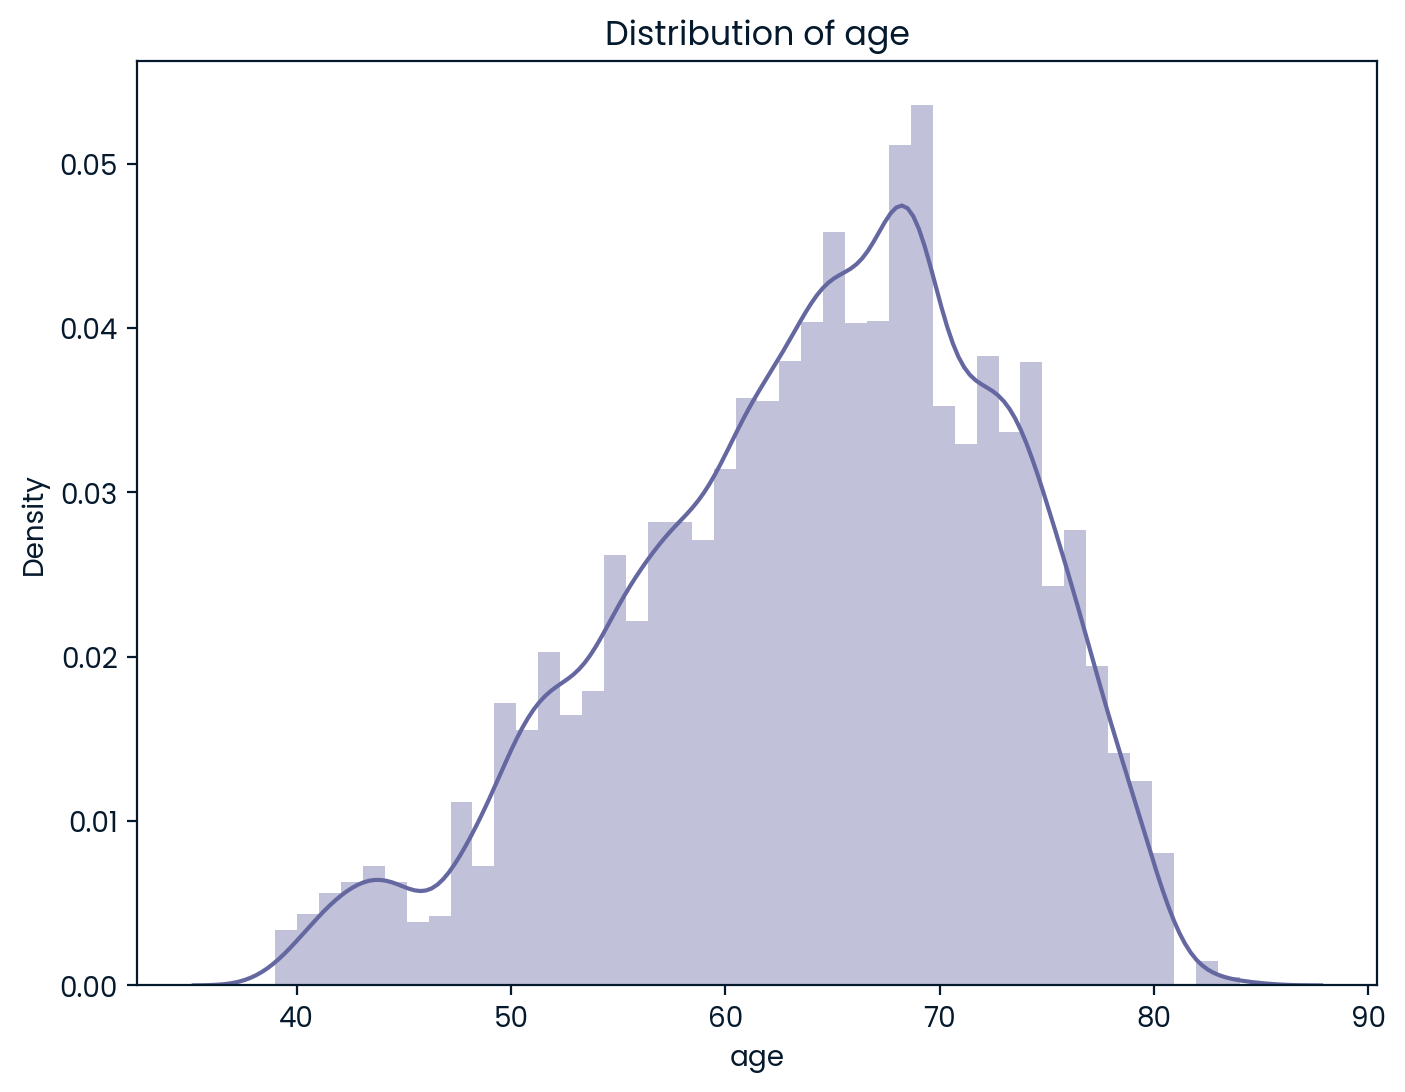

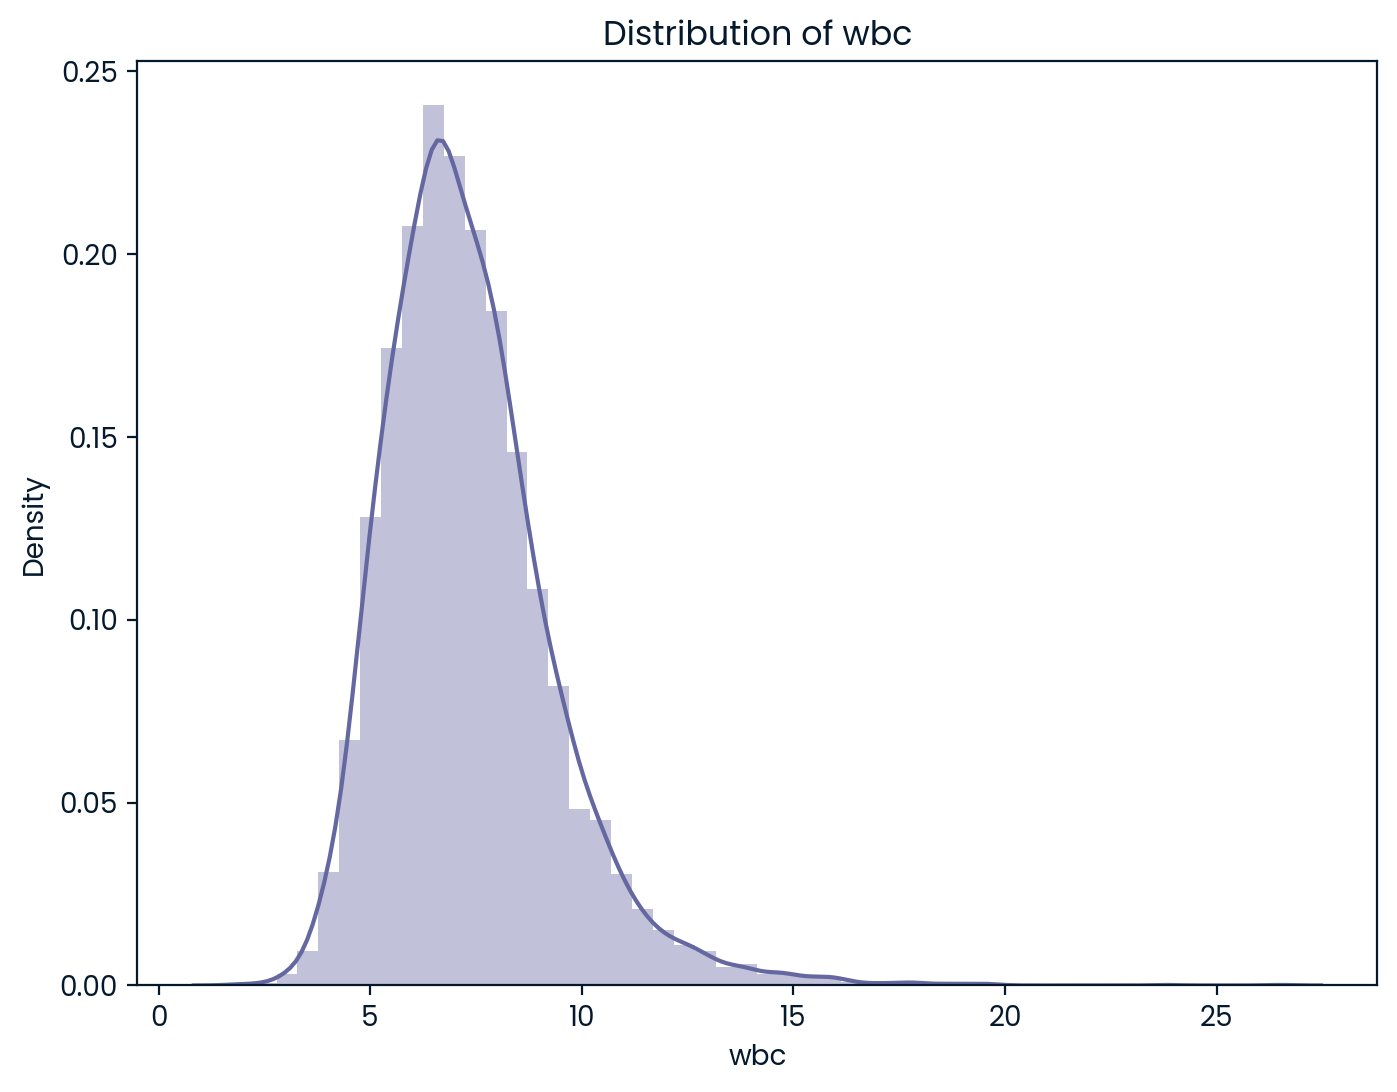

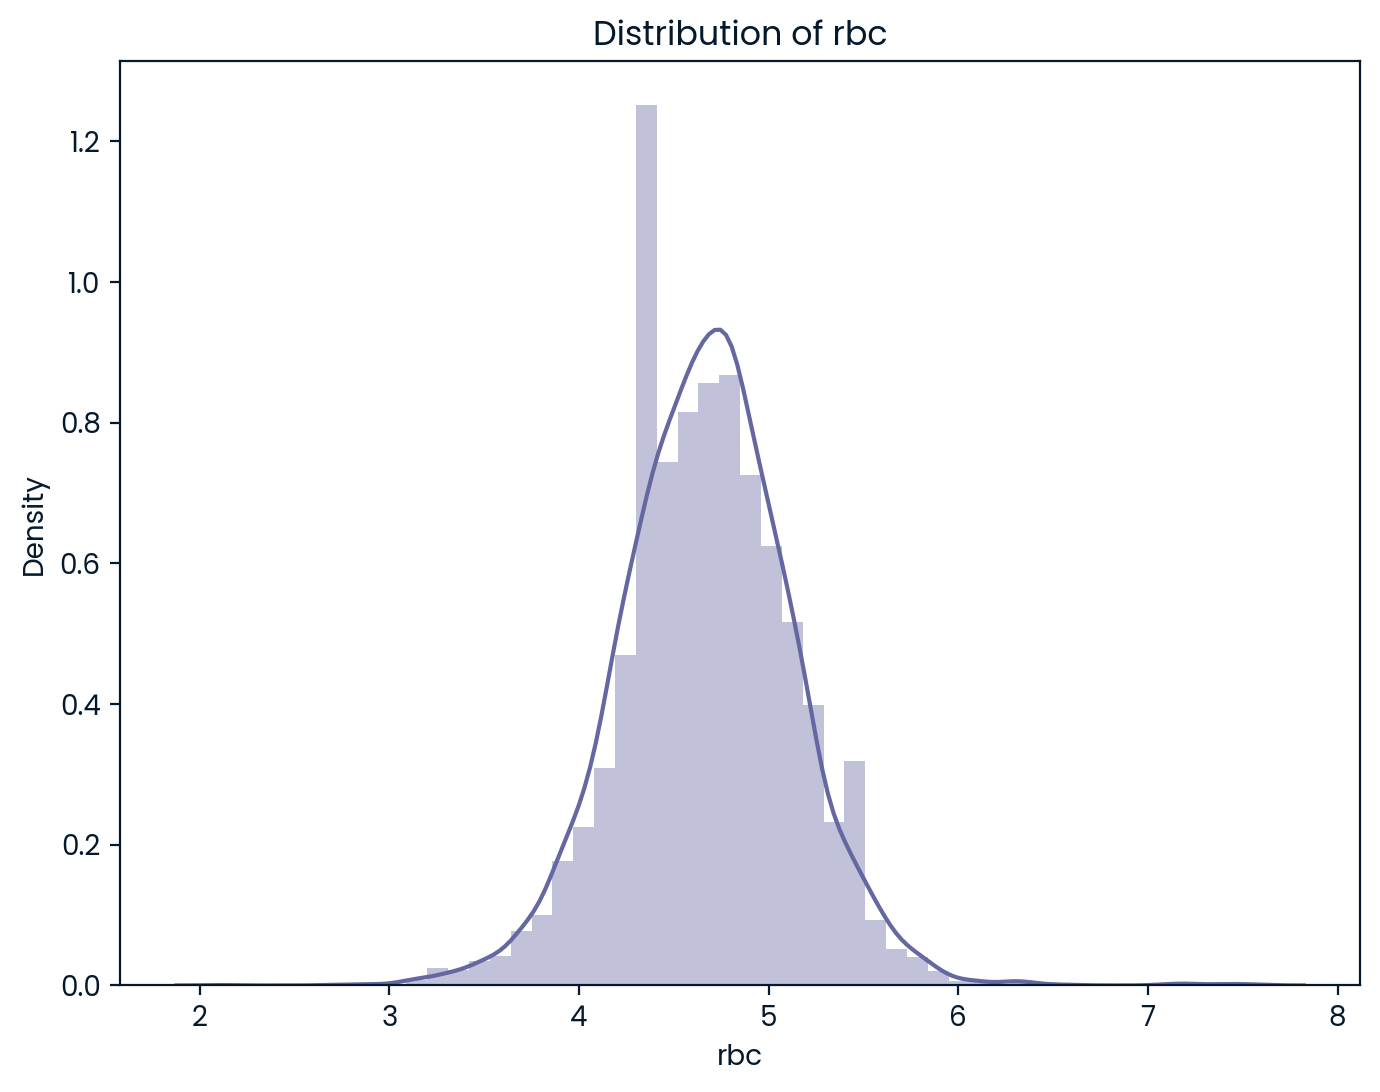

In [29]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(drug_safety.head(30))
print(drug_safety.tail())

# Display the column names and data types
print("\nColumn names and data types:")
print(drug_safety.info())

# Display the summary statistics of the dataset
print("\nSummary statistics:")
print(drug_safety.describe())

# Check for missing values
print("\nMissing values:")
print(drug_safety.isnull().sum())

# Visualize the distribution of numerical columns
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = ['age', 'wbc', 'rbc']
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.distplot(drug_safety[col])
    plt.title(f"Distribution of {col}")
    plt.show()

### Question 1: Determine if the proportion of adverse effects differs significantly between the Drug and Placebo groups

In [30]:

drug_safety['adverse_effects'] = drug_safety['adverse_effects'].astype(str)

# Step 1: Count the number of successes (adverse effects) in each group
adverse_counts = drug_safety.groupby('trx')['adverse_effects'].value_counts().unstack(fill_value=0)
successes_drug = adverse_counts.loc['Drug']['Yes']  # Count of "Yes" in Drug group
successes_placebo = adverse_counts.loc['Placebo']['Yes']  # Count of "Yes" in Placebo group

# Step 2: Total number of observations (rows) in each group
total_counts_drug = adverse_counts.loc['Drug'].sum()  # Total individuals in Drug group
total_counts_placebo = adverse_counts.loc['Placebo'].sum()  # Total individuals in Placebo group

# Step 3: Perform two-sample proportions z-test
successes = np.array([successes_drug, successes_placebo])
totals = np.array([total_counts_drug, total_counts_placebo])
two_sample_results = proportions_ztest(successes, totals)

# Step 4: Get the p-value
two_sample_p_value = two_sample_results[1]

# Output the p-value to determine statistical significance
print("Two-sample p-value:", two_sample_p_value)


Two-sample p-value: 0.9639333330262475


In a two-sample proportion test, a p-value of 0.9639333330262475 indicates that there is strong evidence to support the null hypothesis, which states that the two population proportions are equal. In other words, the test suggests that the observed difference between the two sample proportions is likely due to chance rather than a statistically significant difference between the two populations. Therefore, we fail to reject the null hypothesis and conclude that the two population proportions are likely equal.

### Question 2: Find out if the number of adverse effects is independent of the treatment and control groups

In [31]:
# 2. Association between adverse effects and the groups
drug_safety['trx'] = drug_safety['trx'].astype('category')
drug_safety['num_effects'] = drug_safety['num_effects'].astype('category')

stat, p, dof = pingouin.chi2_independence(drug_safety, x='trx', y='num_effects')
num_effects_p_value = p

print("Number of effects p-value:", num_effects_p_value)

Number of effects p-value: num_effects     0    1   2  3
trx                          
Drug         9703  956  63  5
Placebo      4864  486  25  1


Based on the results, we fail to reject the null hypothesis that the number of adverse effects is independent of the treatment group. This suggests that there is no significant association between the treatment group (Drug or Placebo) and the number of adverse effects.

Practical Implication

In practical terms, this means that the distribution of adverse effects (0, 1, 2, or 3) is similar between the Drug and Placebo groups. The majority of patients in both groups experienced no adverse effects, with decreasing frequencies for 1, 2, and 3 adverse effects. This implies that the treatment group does not have a significant impact on the number of adverse effects experienced by patients.

### 3.Examine if there is a significant difference between the ages of the Drug and Placebo groups, storing the p-value of your test in a variable called age_group_effects_p_value.

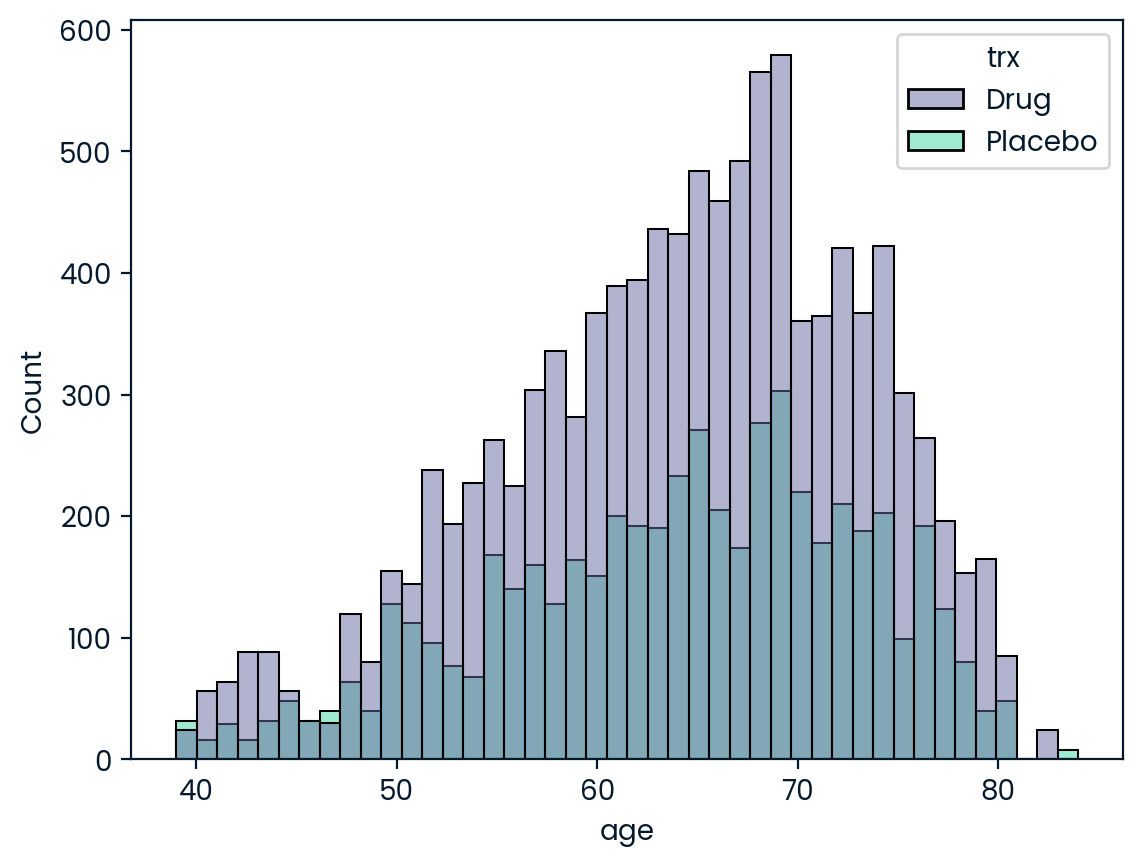

Normality test results:                 W          pval  normal
trx                                    
Drug     0.976785  2.189152e-38   False
Placebo  0.975595  2.224950e-29   False


In [32]:
# 3.Inspecting whether age is normally distributed
sns.histplot(data=drug_safety, x='age', hue='trx')
plt.show()

# Shapiro-Wilks test for normality
normality_results = pingouin.normality(drug_safety, dv='age', group='trx')
print("Normality test results:", normality_results)


The p-values for both the Drug and Placebo groups are extremely low (2.189152e-38 and 2.224950e-29, respectively), indicating that the null hypothesis can be rejected. This means that the data does not follow a normal distribution for both groups.

In [33]:
# 4. Significant difference between the ages of both groups
age_drug = drug_safety[drug_safety['trx'] == 'Drug']['age']
age_placebo = drug_safety[drug_safety['trx'] == 'Placebo']['age']

mwu_results = pingouin.mwu(age_drug, age_placebo)
age_group_effects_p_value = mwu_results['p-val'][0]

print("Age group effects p-value:", age_group_effects_p_value)

Age group effects p-value: 0.25696267004066287


The results of the hypothesis testing suggest that the pharmaceutical drug may not have a significant effect on the adverse effects, as the p-value for the age group effects is 0.25696267004066287, which is greater than the typical significance level of 0.05. This implies that the age group may not be a significant factor in the treatment effect. Further analysis is necessary to explore the relationship between the age group and the treatment effect.

## ALTERNATIVE VERSION 

Two-sample p-value: 0.9639333330262475
Number of effects p-value: 0.6150123339426765
Normality test results:                 W          pval  normal
trx                                    
Drug     0.976785  2.189152e-38   False
Placebo  0.975595  2.224950e-29   False
Age group effects p-value: MWU    0.256963
Name: p-val, dtype: float64


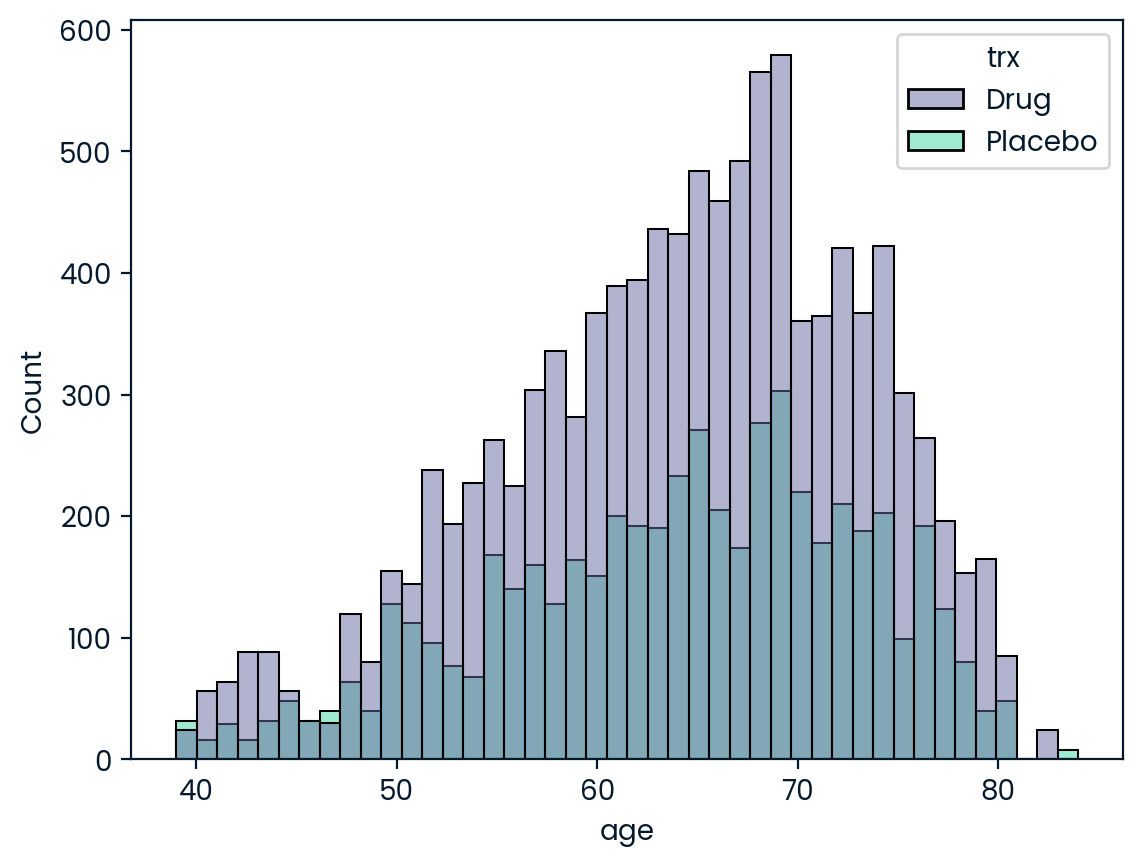

In [34]:
# Import packages
import numpy as np
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest
import pingouin
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
drug_safety = pd.read_csv("drug_safety.csv")

# Count the adverse_effects column values for each trx group
adv_eff_by_trx = drug_safety.groupby("trx").adverse_effects.value_counts()

# Compute total rows in each group
adv_eff_by_trx_totals = adv_eff_by_trx.groupby("trx").sum()

# Create an array of the "Yes" counts for each group
yeses = [adv_eff_by_trx["Drug"]["Yes"], adv_eff_by_trx["Placebo"]["Yes"]]

# Create an array of the total number of rows in each group
n = [adv_eff_by_trx_totals["Drug"], adv_eff_by_trx_totals["Placebo"]]

# Perform a two-sided z-test on the two proportions
two_sample_results = proportions_ztest(yeses, n)

# Store the p-value
two_sample_p_value = two_sample_results[1]
# Output the p-value to determine statistical significance
print("Two-sample p-value:", two_sample_p_value)

# Determine if num_effects and trx are independent
num_effects_groups = pingouin.chi2_independence(
    data=drug_safety, x="num_effects", y="trx")

# Extract the p-value
num_effects_p_value = num_effects_groups[2]["pval"][0]
print("Number of effects p-value:", num_effects_p_value)

# Create a histogram with Seaborn
sns.histplot(data=drug_safety, x="age", hue="trx")
plt.show

# Optionally - confirm the histogram's output by conducting a normality test
# To choose between unpaired t-test and Wilcoxon-Mann-Whitney test
normality = pingouin.normality(
    data=drug_safety,
    dv='age',
    group='trx',
    method='shapiro', # the default
    alpha=0.05) # 0.05 is also the default

normality_results = pingouin.normality(drug_safety, dv='age', group='trx')
print("Normality test results:", normality_results)

# Select the age of the Drug group
age_trx = drug_safety.loc[drug_safety["trx"] == "Drug", "age"]

# Select the age of the Placebo group
age_placebo = drug_safety.loc[drug_safety["trx"] == "Placebo", "age"]

# Since the data distribution is not normal
# Conduct a two-sided Mann-Whitney U test
age_group_effects = pingouin.mwu(age_trx, age_placebo)

# Extract the p-value
age_group_effects_p_value = age_group_effects["p-val"]
print("Age group effects p-value:", age_group_effects_p_value)